# Lecture 16 Supplementary Notebook

## DSC 40A, Fall 2024

The following cell sets up the necessary imports – don't worry too much about it.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("svg")

pd.options.plotting.backend = "plotly"

# DSC 40A preferred styles
pio.templates["dsc40a"] = go.layout.Template(
    layout=dict(
        margin=dict(l=30, r=30, t=30, b=30),
        autosize=True,
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True),
        title=dict(x=0.5, xanchor="center"),
    )
)
pio.templates.default = "simple_white+dsc40a"

from IPython.display import HTML
from ipywidgets import interact, widgets, FloatSlider
pio.renderers.default = 'png'

## Gradient descent

See the Lecture 15 notebook or [dsc40a.com/resources/lectures/lec15](https://dsc40a.com/resources/lectures/lec15) for animations.

$$f(t) = 5t^4 - t^3 - 5t^2 + 2t - 9$$

In [13]:
def f(t):
    return 5 * (t**4) - (t**3) - 5 * (t**2) + 2 * t - 9

def df(t):
    return 20 * (t**3) - 3 * (t**2) - 10 * t + 2

def create_tangent_line(t):
    slope = df(t)
    intercept = f(t) - slope * t
    return lambda x: intercept + slope * x

### Gradient descent update rule

Let's start with an initial guess $t_0 = 0$ and a learning rate $\alpha = 0.01$.

$$t_{i + 1} = t_i - \alpha \frac{df}{dt}(t_i)$$

In [14]:
def minimize_f(df, t0, alpha, verbose=True):
    t = t0
    
    # Iterate until the derivative of f at t is less than 0.0001 in magnitude.
    while np.abs(df(t)) >= 0.0001:
        if verbose:
            print(round(t, 4), round(f(t), 4))
        t = t - alpha * df(t)
    print('Best t:', t)

In [4]:
minimize_f(df, t0=0, alpha=0.01)

0 -9
-0.02 -9.042
-0.042 -9.0927
-0.0661 -9.1537
-0.0925 -9.2267
-0.1214 -9.3135
-0.1527 -9.4158
-0.1866 -9.5347
-0.2229 -9.6708
-0.2615 -9.8235
-0.302 -9.9909
-0.344 -10.1687
-0.3867 -10.3513
-0.4293 -10.5311
-0.4709 -10.7001
-0.5104 -10.8511
-0.547 -10.9789
-0.58 -11.0811
-0.6089 -11.1586
-0.6335 -11.2141
-0.654 -11.2521
-0.6706 -11.277
-0.6839 -11.2927
-0.6943 -11.3023
-0.7023 -11.308
-0.7085 -11.3113
-0.7131 -11.3132
-0.7166 -11.3143
-0.7193 -11.3149
-0.7213 -11.3153
-0.7227 -11.3155
-0.7238 -11.3156
-0.7247 -11.3156
-0.7253 -11.3157
-0.7257 -11.3157
-0.726 -11.3157
-0.7263 -11.3157
-0.7265 -11.3157
-0.7266 -11.3157
-0.7267 -11.3157
-0.7268 -11.3157
-0.7268 -11.3157
-0.7269 -11.3157
-0.7269 -11.3157
-0.7269 -11.3157
-0.7269 -11.3157
-0.727 -11.3157
-0.727 -11.3157
-0.727 -11.3157
-0.727 -11.3157
-0.727 -11.3157
-0.727 -11.3157
-0.727 -11.3157
-0.727 -11.3157
Best t: -0.7269816686876617


What if we start with a different initial guess?

In [ ]:
minimize_f(df, t0=1.1, alpha=0.01)

What if we use a different learning rate?

In [ ]:
minimize_f(t0=0, alpha=0.1)

Some learning rates are so large that the values of $t$ explode towards infinity! Watch what happens when we use a learning rate of 1:

In [ ]:
minimize_f(df, t0=0, alpha=1)

## Convexity

In [15]:
def convexity_visual(a, b, t):
    ts = np.linspace(-20, 20, 1000)

    f = lambda x: x**3 - 3*x**2 + 4*x - 1

    fig = px.line(x=ts, y=f(ts)).update_traces(line=dict(width=8))
    fig.update_layout(xaxis_title='$t$', 
                      yaxis_title='$f(t)$', 
                      width=800, height=600)

    fig.add_trace(go.Scatter(x=[a, b], y=[f(a), f(b)])).update_traces(line=dict(width=8))
    fig.add_trace(go.Scatter(x=[(1-t) * a + t * b], y=[f((1-t) * a + t * b)], mode='markers')).update_traces(marker=dict(size=25))
    fig.add_trace(go.Scatter(x=[(1-t) * a + t * b], y=[(1-t) * f(a) + t * f(b)], mode='markers')).update_traces(marker=dict(size=25))
    fig.update_layout(showlegend=False, title=f't={t}')
    return fig

In [16]:
interact(convexity_visual, a=(-20, 5, 0.1), b=(5, 20, 0.1), t=FloatSlider(min=0, max=1, step=0.01, value=0.5))

interactive(children=(FloatSlider(value=-8.0, description='a', max=5.0, min=-20.0), FloatSlider(value=12.0, de…

<function __main__.convexity_visual(a, b, t)>

## More examples

### Example: Huber loss

For the constant model, $H(x) = h$:

$$L_\text{huber}(y_i, h) = \begin{cases} \frac{1}{2} (y_i - h)^2 & \text{if } | y_i - h| \leq \delta \\ \delta \cdot (| y_i - h | - \frac{1}{2} \delta) & \text{otherwise} \end{cases}$$

In [17]:
y = np.array([72])

In [18]:
def R(h, delta):
    out = 0
    for i in range(len(y)):
        if np.abs(y[i] - h) <= delta:
            out += (1 / 2) * (y[i] - h) ** 2
        else:
            out += delta * (np.abs(y[i] - h) - (1 / 2) * delta)
    return out / len(y)

In [19]:
h = np.linspace(np.min(y) - 10, np.max(y) + 10, 10000)
Rh = [R(hi, delta=1) for hi in h]

For a single point:

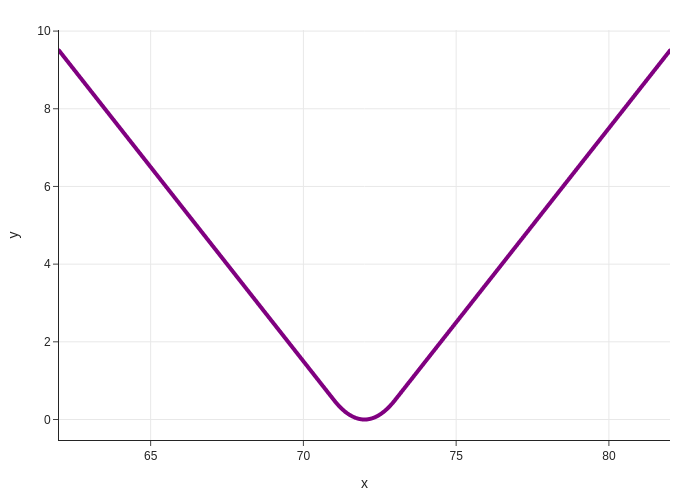

In [20]:
px.line(x=h, y=Rh).update_traces(line_color='purple', line_width=4)

In [29]:
def dR(h, delta):
    out = 0
    for i in range(len(y)):
        if np.abs(y[i] - h) <= delta:
            out += -(y[i] - h)
        else:
            out += -delta * (1 if (y[i] - h > 0) else -1)
    return out / len(y)

For a larger dataset:

In [30]:
y = np.array([72, 90, 61, 85, 92])

In [31]:
h = np.linspace(np.min(y) - 10, np.max(y) + 15, 10000)
Rh = [R(hi, delta=1) for hi in h]

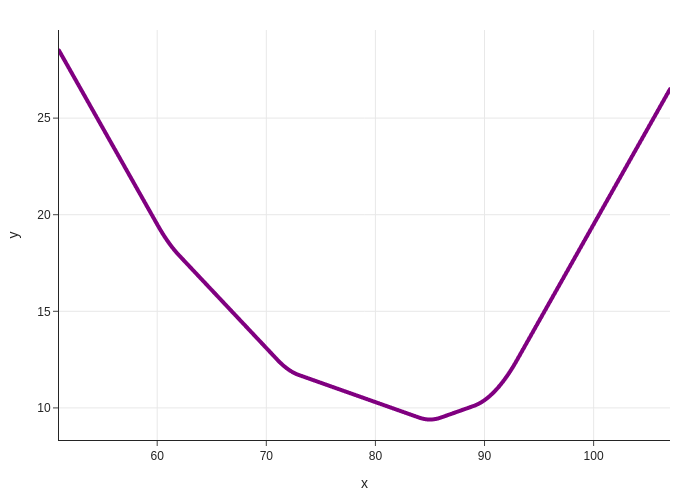

In [32]:
px.line(x=h, y=Rh).update_traces(line_color='purple', line_width=4)

$$L_\text{huber}(y_i, h) = \begin{cases} \frac{1}{2} (y_i - h)^2 & \text{if } | y_i - h| \leq \delta \\ \delta \cdot (| y_i - h | - \frac{1}{2} \delta) & \text{otherwise} \end{cases}$$

$$\implies \frac{\partial L}{\partial h}(h) = \begin{cases} -(y_i - h)  & \text{if } | y_i - h| \leq \delta \\ -\delta \cdot \text{sign}(y_i - h) & \text{otherwise} \end{cases}$$

$$\implies \frac{dR_\text{huber}}{dh}(h) = \frac{1}{n} \sum_{i = 1}^n \begin{cases} -(y_i - h)  & \text{if } | y_i - h| \leq \delta \\ -\delta \cdot \text{sign}(y_i - h) & \text{otherwise} \end{cases}$$


Now, let's use gradient descent to minimize. Let's use an initial guess of $h_0 = 25$ and $\alpha = 10$:

In [34]:
h = 80
alpha = 1

print(np.abs(dR(h, delta=1)))
while np.abs(dR(h, delta=1)) >= 0.001:
    print(round(h, 4), round(dR(h, delta=1), 4))
    h = h - alpha * dR(h, delta=1)

0.2
80 -0.2
80.2 -0.2
80.4 -0.2
80.6 -0.2
80.8 -0.2
81.0 -0.2
81.2 -0.2
81.4 -0.2
81.6 -0.2
81.8 -0.2
82.0 -0.2
82.2 -0.2
82.4 -0.2
82.6 -0.2
82.8 -0.2
83.0 -0.2
83.2 -0.2
83.4 -0.2
83.6 -0.2
83.8 -0.2
84.0 -0.2
84.2 -0.16
84.36 -0.128
84.488 -0.1024
84.5904 -0.0819
84.6723 -0.0655
84.7379 -0.0524
84.7903 -0.0419
84.8322 -0.0336
84.8658 -0.0268
84.8926 -0.0215
84.9141 -0.0172
84.9313 -0.0137
84.945 -0.011
84.956 -0.0088
84.9648 -0.007
84.9719 -0.0056
84.9775 -0.0045
84.982 -0.0036
84.9856 -0.0029
84.9885 -0.0023
84.9908 -0.0018
84.9926 -0.0015
84.9941 -0.0012
